# Plot OpenFAST Outputs

In [3]:
# Load all the tools
import numpy as np
# from wisdem.aeroelasticse.CaseLibrary import ROSCO_Test
import os, subprocess

from weis.aeroelasticse.FAST_reader import InputReader_Common, InputReader_OpenFAST, InputReader_FAST7
from weis.aeroelasticse.FAST_writer import InputWriter_Common, InputWriter_OpenFAST, InputWriter_FAST7
from weis.aeroelasticse.runFAST_pywrapper import runFAST_pywrapper_batch
from weis.aeroelasticse.CaseGen_General import CaseGen_General
from weis.aeroelasticse.CaseGen_IEC import CaseGen_IEC
from pCrunch import pdTools
from pCrunch import Processing, Analysis
from weis.aeroelasticse.Util import FileTools
# Instantiate fast_IO
from ROSCO_toolbox.ofTools.fast_io import output_processing
op = output_processing.output_processing()

import pandas as pd

import matplotlib.pyplot as plt
# %matplotlib

i_fig = 0

Set outputs

In [4]:
outfiles = [
#     '/Users/dzalkind/Tools/WEIS-1/outputs/iea15mw/iea15mw_00.outb',
#     '/Users/dzalkind/Tools/WEIS-1/outputs/iea15mw/iea15mw_01.outb',
#     '/Users/dzalkind/Tools/WEIS-1/outputs/iea15mw/iea15mw_02.outb',
#     '/Users/dzalkind/Tools/WEIS-1/outputs/iea15mw/iea15mw_08.outb',
#     '/Users/dzalkind/Tools/ROSCO_toolbox/Examples/examples_out/13_Simulink_Test/OL_Test_1.SFunc.outb',
    '/Users/dzalkind/Tools/WEIS-3/results/CT-semi/ntm_long/DISCON-CT-semi/iea15mw_07.outb',
    '/Users/dzalkind/Tools/WEIS-3/results/CT-semi/ntm_long/DISCON-CT-semi/iea15mw_13.outb',
#     '/Users/dzalkind/Tools/WEIS-4/optimizations/both_debug_nowrapper/NREL5MW_OC3_spar_IEC_0.outb',
#     '/Users/dzalkind/Tools/WEIS-4/optimizations/outputs_opt_both_debug/NREL5MW_OC3_spar_IEC_0.outb',
#     '/Users/dzalkind/Tools/WEIS-4/optimizations/outputs_opt_both_debug2/NREL5MW_OC3_spar_IEC_0.outb',
#     '/Users/dzalkind/Tools/WEIS-4/optimizations/outputs_opt_both_debug3/NREL5MW_OC3_spar_IEC_0.outb',
#     '/Users/dzalkind/Tools/WEIS-4/optimizations/outputs_opt_both_debug4/NREL5MW_OC3_spar_IEC_0.outb',
#     '/Users/dzalkind/Tools/WEIS-3/sowfa_debug/rotor_sweep/c_001_sp6_h150_D240_oR2_yaw_base/IEA-15-240-RWT-Monopile.2.T2.out',
#     '/Users/dzalkind/Tools/WEIS-3/results/CT-barge/DISCON-CT-barge_hiBW/simp/step_1.outb',
]

# outfiles

Wind1VelX is not available as an output channel.
BldPitch1 is not available as an output channel.
GenTq is not available as an output channel.
GenSpeed is not available as an output channel.
TwrBsMyt is not available as an output channel.
GenPwr is not available as an output channel.
NacYaw is not available as an output channel.
Wind1VelX is not available as an output channel.
BldPitch1 is not available as an output channel.
GenTq is not available as an output channel.
GenSpeed is not available as an output channel.
TwrBsMyt is not available as an output channel.
GenPwr is not available as an output channel.
NacYaw is not available as an output channel.
RtVAvgxh is not available as an output channel.
Fl_Pitcom is not available as an output channel.
PC_MinPit is not available as an output channel.
WE_Vw is not available as an output channel.
RtVAvgxh is not available as an output channel.
Fl_Pitcom is not available as an output channel.
PC_MinPit is not available as an output channel.
W

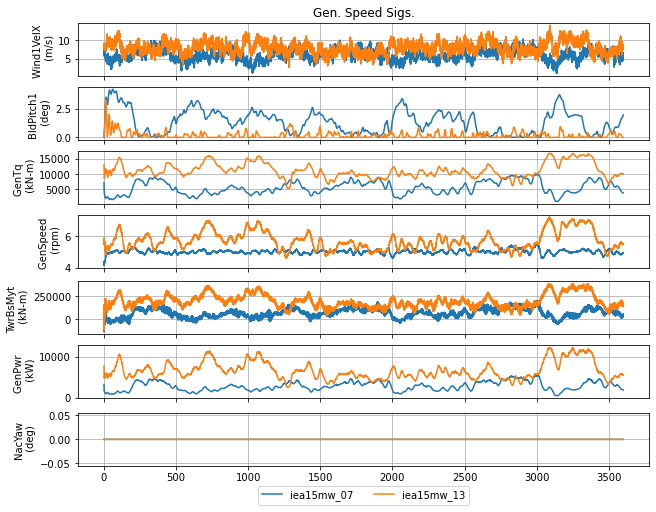

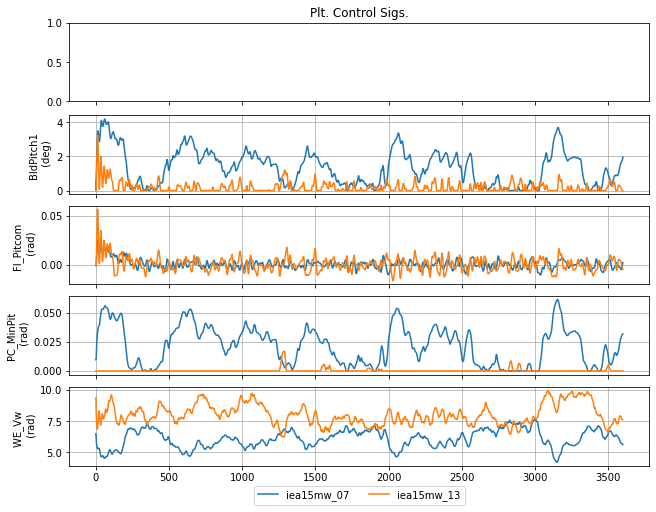

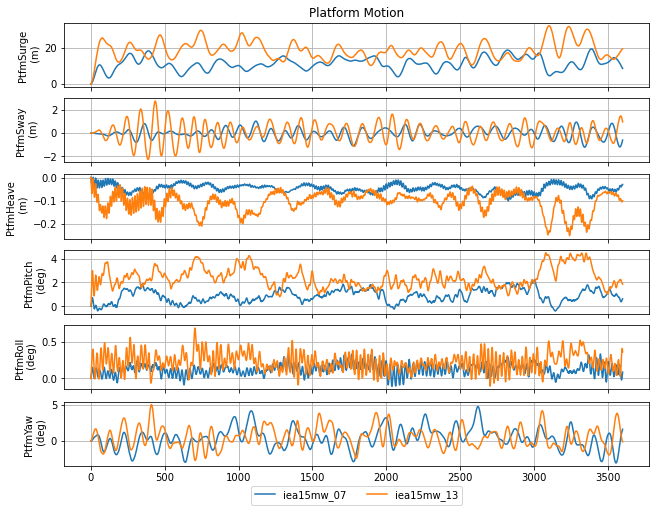

In [5]:
output_ext = '.out'
plt.rcParams["figure.figsize"] = [9,7]

#  Define Plot cases 
cases = {}
cases['Gen. Speed Sigs.'] = ['Wind1VelX', 'BldPitch1', 'GenTq', 'GenSpeed','TwrBsMyt','GenPwr','NacYaw']#,'PtfmPitch','PtfmYaw','NacYaw']
# cases['Debug'] = ['IPDefl1','OoPDefl1','Azimuth','RotTorq']#,'PtfmPitch','PtfmYaw','NacYaw']
cases['Plt. Control Sigs.'] = ['RtVAvgxh', 'BldPitch1', 'Fl_Pitcom', 'PC_MinPit','WE_Vw']
cases['Platform Motion'] = ['PtfmSurge', 'PtfmSway', 'PtfmHeave', 'PtfmPitch','PtfmRoll','PtfmYaw']

op = output_processing.output_processing()

# Rosco outfiles
r_outfiles = [out.split('.out')[0] + '.RO.dbg' for out in outfiles]

fast_out = []
fast_out = op.load_fast_out(outfiles, tmin=0)
rosco_out = op.load_fast_out(r_outfiles, tmin=0)
  
# Combine outputs
comb_out = [None] * len(fast_out)
for i, (r_out, f_out) in enumerate(zip(rosco_out,fast_out)):
    r_out.update(f_out)
    comb_out[i] = r_out

# comb_out
# if False:
#     comb_out[0]['meta']['name'] = 'Variable Bandwidth'

    
# Plot
fig, ax = op.plot_fast_out(comb_out,cases, showplot=True)

if False:  # Print!
    
    save_fig_dir = '/Users/dzalkind/Projects/CarbonTrust/Deliverables'
    for f in fig:
        f.savefig(os.path.join(save_fig_dir,'ts'+str(i_fig)))
        i_fig += 1

In [6]:
fast_out[0]['Wind1VelX']

array([6.65148069, 6.64718478, 6.64288887, ..., 6.50814042, 6.57988215,
       6.65148069])

(PtfmYaw,0) max period = 150.00041666666667
(PtfmYaw,1) max period = 85.71452380952381


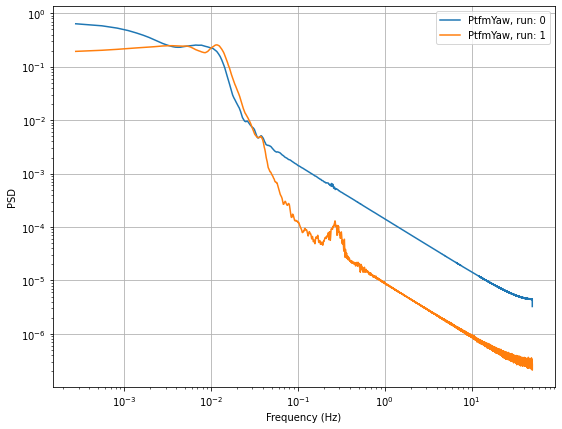

In [11]:
# Plot Spectral

_,_,max_periods = op.plot_spectral(fast_out,[('PtfmYaw',0),('PtfmYaw',1)],showplot=False,detrend=True)
yaw_fast = fast_out[0]['PtfmYaw']
std_yaw_fast = np.std(yaw_fast)
amp = std_yaw_fast * np.sqrt(2)




# save_yaml(dir_matrix, 'case_matrix.yaml', matrix_out_yaml)

# op

In [48]:
# ret

In [49]:
1/2e-3

3600/38


94.73684210526316

1.9752718440907233

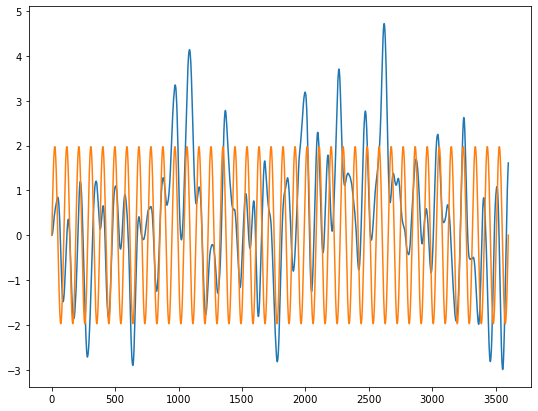

In [50]:
yaw_fast = fast_out[0]['PtfmYaw']
amp = np.std(yaw_fast) * np.sqrt(2)


per = 3600/38

tt = fast_out[0]['Time']

yaw_sowfa = amp * np.sin(2 * np.pi / per * tt)


plt.plot(tt,yaw_fast,tt,yaw_sowfa)

np.min(yaw_fast)

amp

In [51]:
# pull from eagle if necessary
pull_script = '/Users/dzalkind/Tools/WEIS-3/pCrunch/HPC_tools/eagle2local_sim_inp.sh'


basedir = outfiles[0].split('/')[1]
# if basedir == 'scratch':
    
temp = outfiles[0].split('/')
filedir = '/'.join(temp[:-1]) + '/'

namebase = temp[-1].split('.')[0]
search_str = namebase + '*'

shell_cmd = pull_script + ' ' + filedir + ' ' + namebase

shell_cmd
# ret = subprocess.call(pull_script,shell=True)


'/Users/dzalkind/Tools/WEIS-3/pCrunch/HPC_tools/eagle2local_sim_inp.sh /Users/dzalkind/Tools/WEIS-3/results/CT-semi/ntm_long/DISCON-CT-semi/ iea15mw_07'